<a href="https://colab.research.google.com/github/salwaa-hub/UTS_machinelearning_sem4/blob/main/UTS_machinelearning_sem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Wine Dataset for Clustering**


=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None

=== DESKRIPSI DATASET ===
          Alcohol  Malic

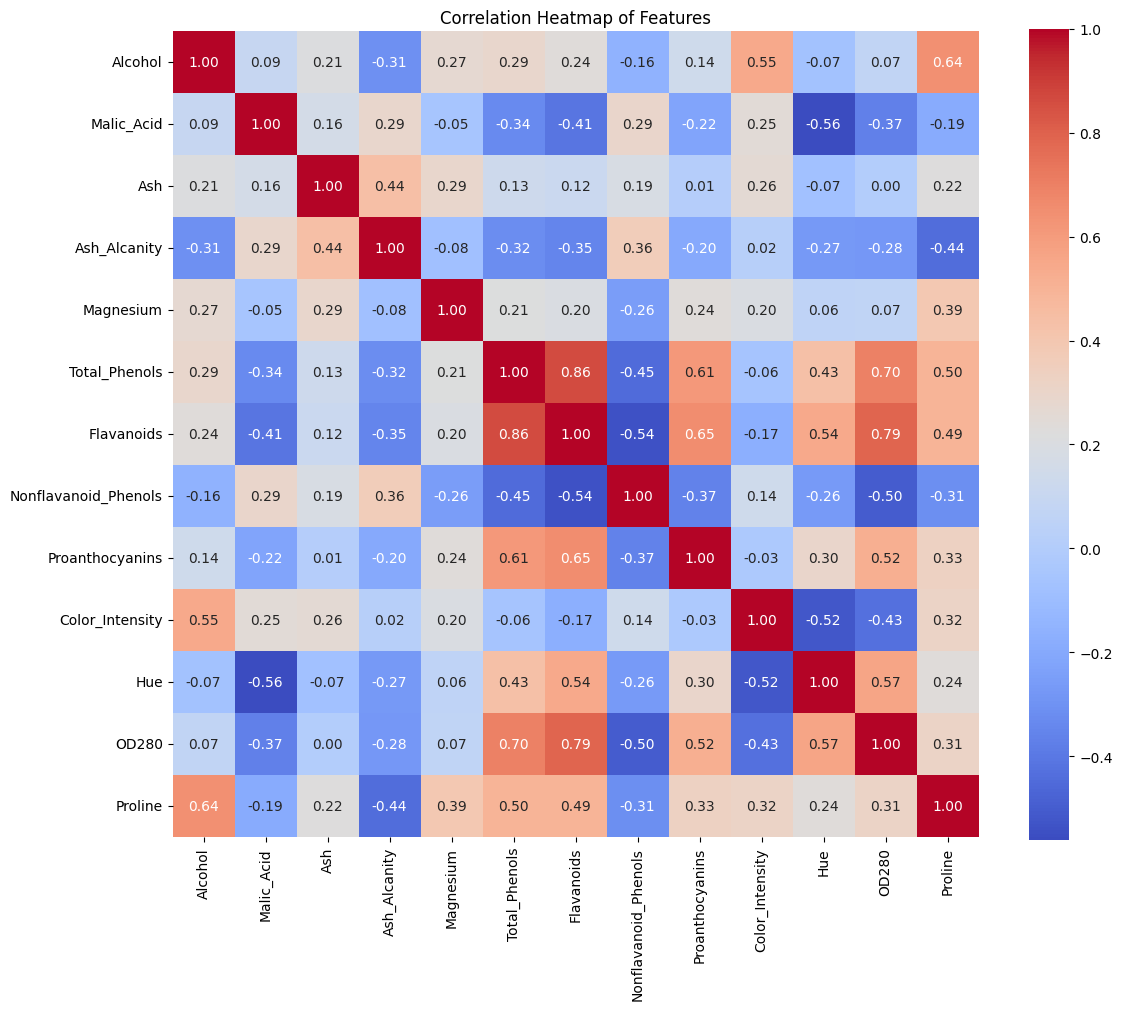


=== ANOVA F-score ===
Alcohol: 113.1661
Malic_Acid: 38.6689
Total_Phenols: 106.8832
Flavanoids: 271.5898
Nonflavanoid_Phenols: 30.9836
Proanthocyanins: 36.2124
Color_Intensity: 111.9231
Hue: 104.7469
OD280: 221.5284
Proline: 200.3120

=== Mutual Information ===
Alcohol: 0.4261
Malic_Acid: 0.3064
Ash_Alcanity: 0.1858
Total_Phenols: 0.4524
Flavanoids: 0.6649
Proanthocyanins: 0.2961
Color_Intensity: 0.5400
Hue: 0.4499
OD280: 0.5735
Proline: 0.5517


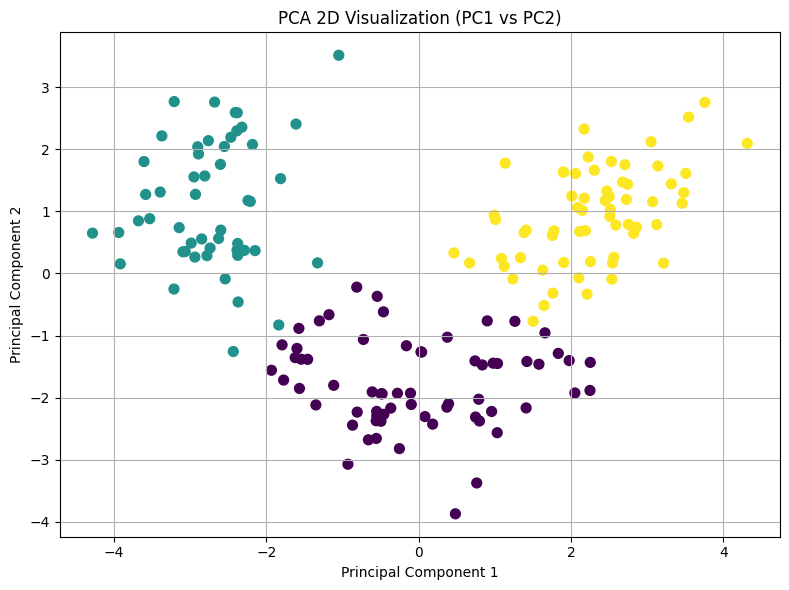


=== PCA Explained Variance Ratio (10 Komponen) ===
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193

=== DBSCAN Clustering ===
Jumlah cluster terdeteksi (DBSCAN): 5
Jumlah noise/outlier: 85
Silhouette Score (DBSCAN): -0.0329


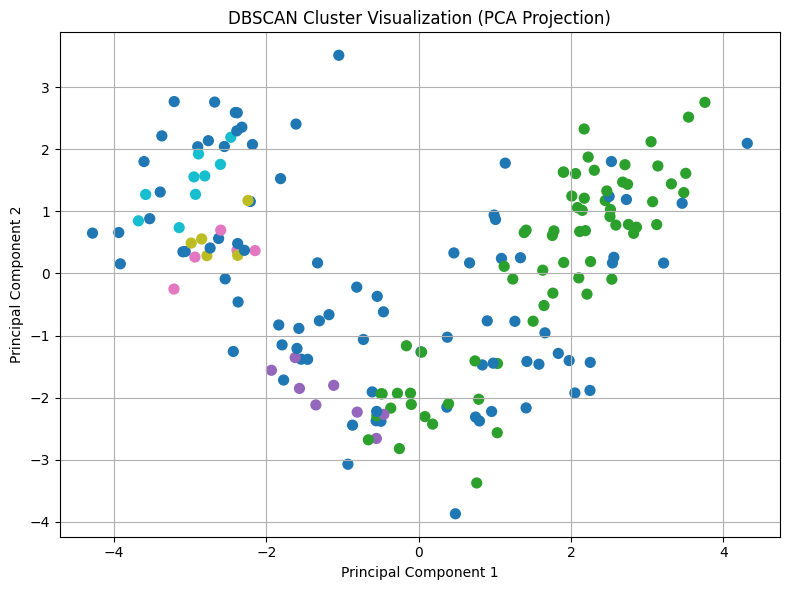

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load dataset
df = pd.read_csv("wine-clustering.csv")

# ========== DATA WRANGLING ==========
print("\n=== INFO DATASET ===")
print(df.info())
print("\n=== DESKRIPSI DATASET ===")
print(df.describe())
print("\n=== CEK NILAI NULL ===")
print(df.isnull().sum())

# ========== HEATMAP KORELASI ==========
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

# ========== STANDARISASI DATA ==========
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ========== KMEANS CLUSTERING ==========
dummy_labels = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X_scaled)

# ========== FEATURE SELECTION ==========
# --- ANOVA F-score ---
selector_f = SelectKBest(score_func=f_classif, k=10)
selector_f.fit(X_scaled, dummy_labels)
features_f = df.columns[selector_f.get_support()]
scores_f = selector_f.scores_[selector_f.get_support()]

print("\n=== ANOVA F-score ===")
for f, s in zip(features_f, scores_f):
    print(f"{f}: {s:.4f}")
df_f = df[features_f]
df_f.to_csv("wine_selected_f_classif.csv", index=False)

# --- Mutual Information ---
selector_mi = SelectKBest(score_func=mutual_info_classif, k=10)
selector_mi.fit(X_scaled, dummy_labels)
features_mi = df.columns[selector_mi.get_support()]
scores_mi = selector_mi.scores_[selector_mi.get_support()]

print("\n=== Mutual Information ===")
for f, s in zip(features_mi, scores_mi):
    print(f"{f}: {s:.4f}")
df_mi = df[features_mi]
df_mi.to_csv("wine_selected_mutual_info.csv", index=False)

# ========== PCA ==========
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
df_pca.to_csv("wine_pca_10components.csv", index=False)

# ========== VISUALISASI PCA 2D ==========
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dummy_labels, cmap='viridis', s=50)
plt.title("PCA 2D Visualization (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== PCA Explained Variance ==========
print("\n=== PCA Explained Variance Ratio (10 Komponen) ===")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# ========== DBSCAN CLUSTERING ==========
print("\n=== DBSCAN Clustering ===")

dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Jumlah cluster terdeteksi (DBSCAN): {n_clusters_dbscan}")
print(f"Jumlah noise/outlier: {n_noise}")

if n_clusters_dbscan > 1:
    sil_score = silhouette_score(X_scaled, dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {sil_score:.4f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya 1 cluster ditemukan.")

# ========== VISUALISASI DBSCAN ==========
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', s=50)
plt.title("DBSCAN Cluster Visualization (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
